In [1]:
# import library for data processing

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

# Preprocessing
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder # untuk ordinal dan binary encoder

from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LogisticRegression,LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Metric
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, make_scorer, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve,mean_absolute_error,mean_absolute_percentage_error,explained_variance_score,mean_squared_error,r2_score


# Ensemble ML
## various type
from sklearn.ensemble import VotingRegressor, StackingRegressor

## similar type
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from xgboost.sklearn import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

# ***Apartment Data in Korea***
### Data source : https://www.kaggle.com/datasets/gunhee/koreahousedata
### by : GUNHEE PARK 
### years : 2018

### **Contents**




1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### Business Problem Understanding

**Context**

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

**Problem Statement**

Individuals or companies usually make apartment (unit) offers. Apartment owner can sell units on a platform by determining their apartments’ prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**Goals**

The goals is to predict the apartment's prices based on provided data, therefore apartment owners could determine the suitable price for their apartment and the bidders could afford the appartment with fair price both for bidders and sellers (make the best machine learning with least error)

**Analytic Approach**

We will use the features (all other information unless sales prices) on provided data to predict the prices for each apartment by using machine learning algorithm. Finally, we will build the regression model to predict apartment prices with least error.

**Metric Evaluation**

There are 4 common metrics used for regression (MAE,RMSE,MAPE,MSE). And for this case we will use MAE, RMSE and MAPE. MSE is not used since it is harder to interpret and it could be represented by RMSE. 

## Load Dataset

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


## Exploring Dataset

### General Exploration

In [3]:
# check data type and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
# check missing values on data
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [5]:
# length of data
len(df)

4123

### Handling duplicated values

In [6]:
# checking number of duplicated values
df.duplicated().sum()

1422

In [7]:
# checking number of duplicated values
df.duplicated().sum()/len(df)*100

34.48944943002668

There total 34.49% data is duplicated. The proportion of duplicated data is high, therefore we need to check qty for each duplicated data.

In [8]:
# checking duplicated values and some data have lot of duplicated values.
df[df.duplicated()].pivot_table(
    'SalePrice',
    list(df.columns[:-1]),
    aggfunc='count'
).sort_values('SalePrice',ascending=False)

SalePrice
HallwayType TimeToSubway SubwayStation         N_FacilitiesNearBy(ETC) N_FacilitiesNearBy(PublicOffice) N_SchoolNearBy(University) N_Parkinglot(Basement) YearBuilt N_FacilitiesInApt Size(sqf)           
terraced    0-5min       Kyungbuk_uni_hospital 0.0                     5.0                              3.0                        930.0                  2013      7                 644              136
mixed       5min~10min   Bangoge               5.0                     5.0                              4.0                        798.0                  2005      7                 572              117
            15min~20min  Myung-duk             5.0                     6.0                              5.0                        536.0                  1993      4                 644               90
terraced    0-5min       Kyungbuk_uni_hospital 0.0                     3.0                              2.0                        1270.0                 2007      10                868               89
mixed       5min~10min   Bangoge               5.0                     5.0                              4.0                        798.0                  2005      7                 914               63
...                                                                                                                                                                                                    ...
terraced    5min~10min   Daegu                 0.0                     3.0                              2.0                        400.0                  2015      7                 644                1
            0-5min       Myung-duk             2.0                     3.0                              1.0                        181.0                  2006      4                 857                1
                                               5.0                     7.0                              5.0                        1174.0                 2014      9                 846                1
                                                                                                                                                                                      843                1
                                                                                                                                                                                      1092               1

[81 rows x 1 columns]

In [9]:
# drop duplicated values
df = df.drop_duplicates()
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [264]:
# checking percentage of 3 highest duplicated data (in numerical since the variable df already dropped and need to rerun from first coding block to use variable)
print (f'Top 1 duplicated data {136/4123*100}%\nTop 2 duplicated data {117/4123*100}%\nTop 3 duplicated data {90/4123*100}%\nTotal duplicated data from only top 3 data is {343/4123*100}%')

Top 1 duplicated data 3.2985690031530437%
Top 2 duplicated data 2.8377395100654863%
Top 3 duplicated data 2.1828765462042203%
Total duplicated data from only top 3 data is 8.31918505942275%


Based on EDA on the duplicated values will be dropped because some of the have multiple duplicated values (top 3 duplicated data perpectively are 136,117,90 which proprotion as much as 8.31% data is duplicated). 

The duplicated data considered to be dropped to reduce tendency of machine learning fitting too much on duplicated data and become less accurate on non duplicated and less duplicated data (meaning duplicated data that less than 5). Therefore, **we will drop the duplicated data and only using 1 unique values of every data for machine learning and prediction so the machine will learn every data equally** and reduce potency of overfitting to specified data.

In [11]:
# checking duplciated data is fully dropped
df.duplicated().sum()

0

In [12]:
list(df.describe(include='object').columns)

['HallwayType', 'TimeToSubway', 'SubwayStation']

## Check unique value on every columns

In [13]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(),df[col].dtypes, df[col].unique()])

UniqueVal = pd.DataFrame(columns=['ColumnName', 'NumberofUnique', 'Dtypes','UniqueValue'],
                     data=listItem)
UniqueVal  

,ColumnName,NumberofUnique,Dtypes,UniqueValue
0,HallwayType,3,object,"[terraced, mixed, corridor]"
1,TimeToSubway,5,object,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,8,object,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4,float64,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,float64,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,float64,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,float64,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,16,int64,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,9,int64,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,int64,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


## Data Understanding

- Based on exploration above, this is the database for apartment'price in Korea
- Every row in the database contains detailed information for each apartment in Korea.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Type of corridor in apartment |
| TimeToSubway | Object | Time needed to get to nearest Subway |
| SubwayStation | Object | Name of nearest Subyway to Apartment |
| N_FacilitiesNearBy(ETC) | Float | Count of Facilities near the apartment besides Public Office, University, Parkinglot |
| N_FacilitiesNearBy(PublicOffice) | Float | Count of Public Offices near the apartment |
| N_SchoolNearBy(University) | Float | Count of Universities near the apartment |
| N_Parkinglot(Basement) | Float | Count of Basements near the apartment |
| YearBuilt | Int | Year of apartment built |
| N_FacilitiesInApt | Int | Count of facilities provided in apartment |
| Size(sqf) | Int | Apartment size in square feet |
| SalePrice | Int | Target for prediction, Sales price of the apartment |

<br>

## Simple EDA

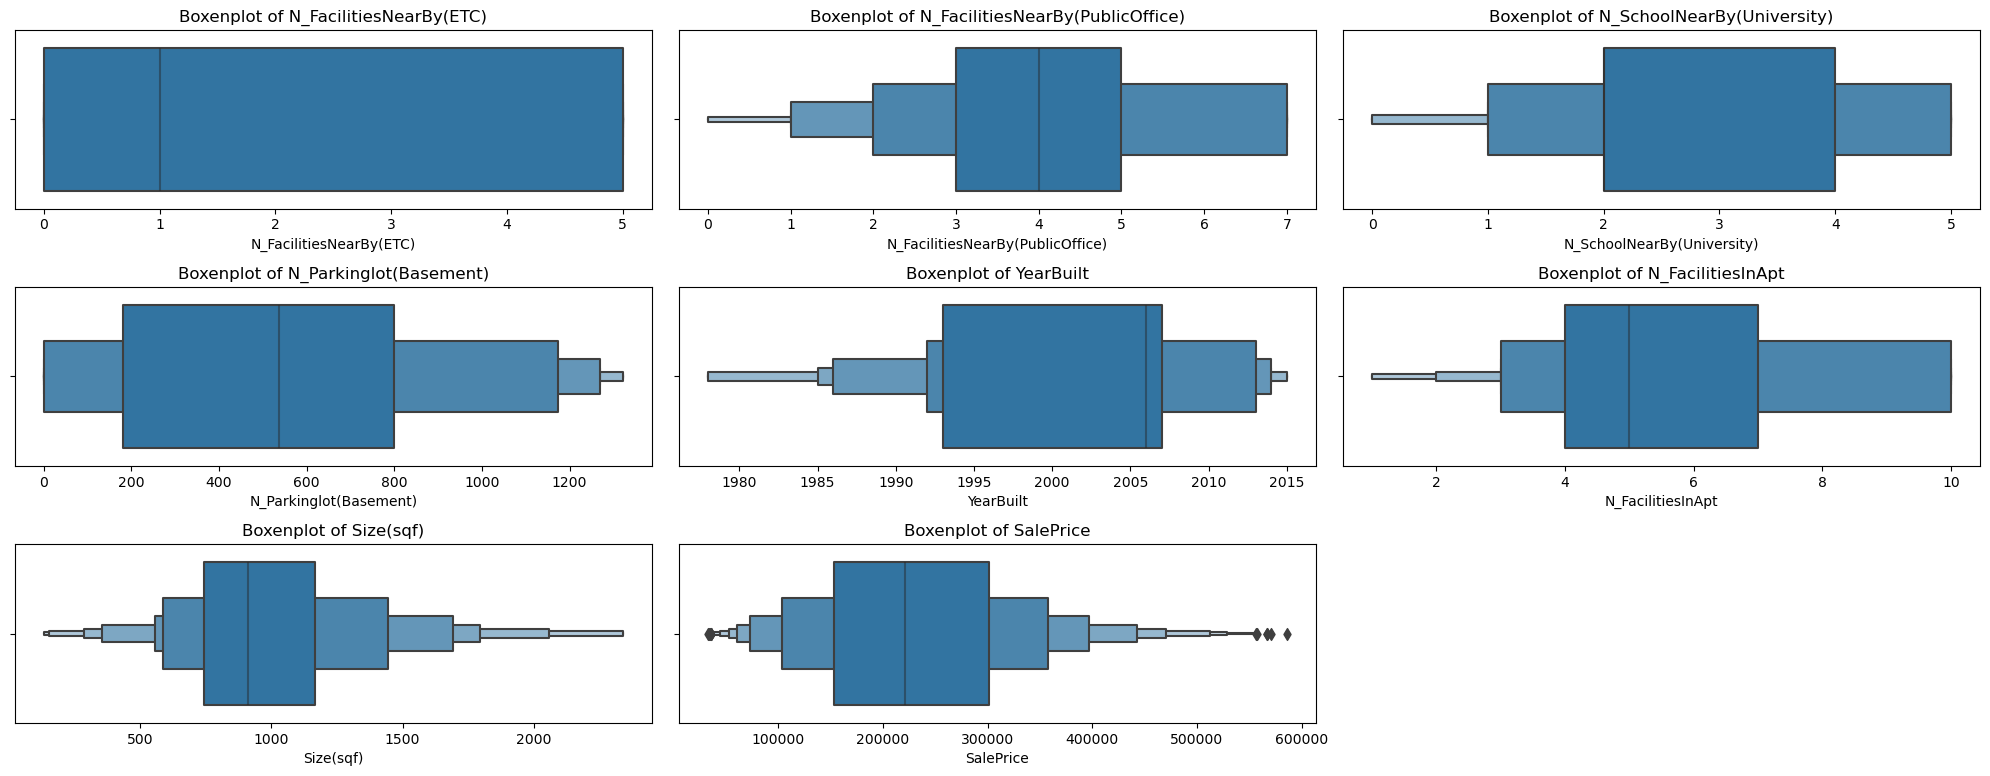

In [14]:
# checking outlier from each columns by using IQR (default is 1.5 {Q3-Q1})
plt.figure(figsize=(20,10))
a = 1 

for i in list(df.describe().columns):
    plt.subplot(4,3,a)
    sns.boxenplot(data=df,x=i)
    plt.title(f'Boxenplot of {i}')
    plt.tight_layout()
    a += 1

From boxenplots above describe that mostly the data is within the IQR unless for SalePrice that have some outliers both in lower and upper values.

Checking lower and upper values of outliers based on boxenplit

In [15]:
# lower values outliers
df[df['SalePrice']<40000]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
216,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,38938
332,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,39823
499,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,36283
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
710,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,38053
898,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
1306,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,37168
1908,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743


In [16]:
# upper values outliers
df[df['SalePrice']>550000]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,553097
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637


From exploration lower and upper outliers, we could conclude that the data is valid and concentrated. 

Concentrated meaning that the lower outliers mostly have same characteristic which are near SubwayStation 'Myung-duk' and mostly built in 1992. 

While the upper outlies mostly near SubwayStation 'Kyungbuk_uni_hospital' and mostly built in 2007.

***Barplot hue by HallwayType***

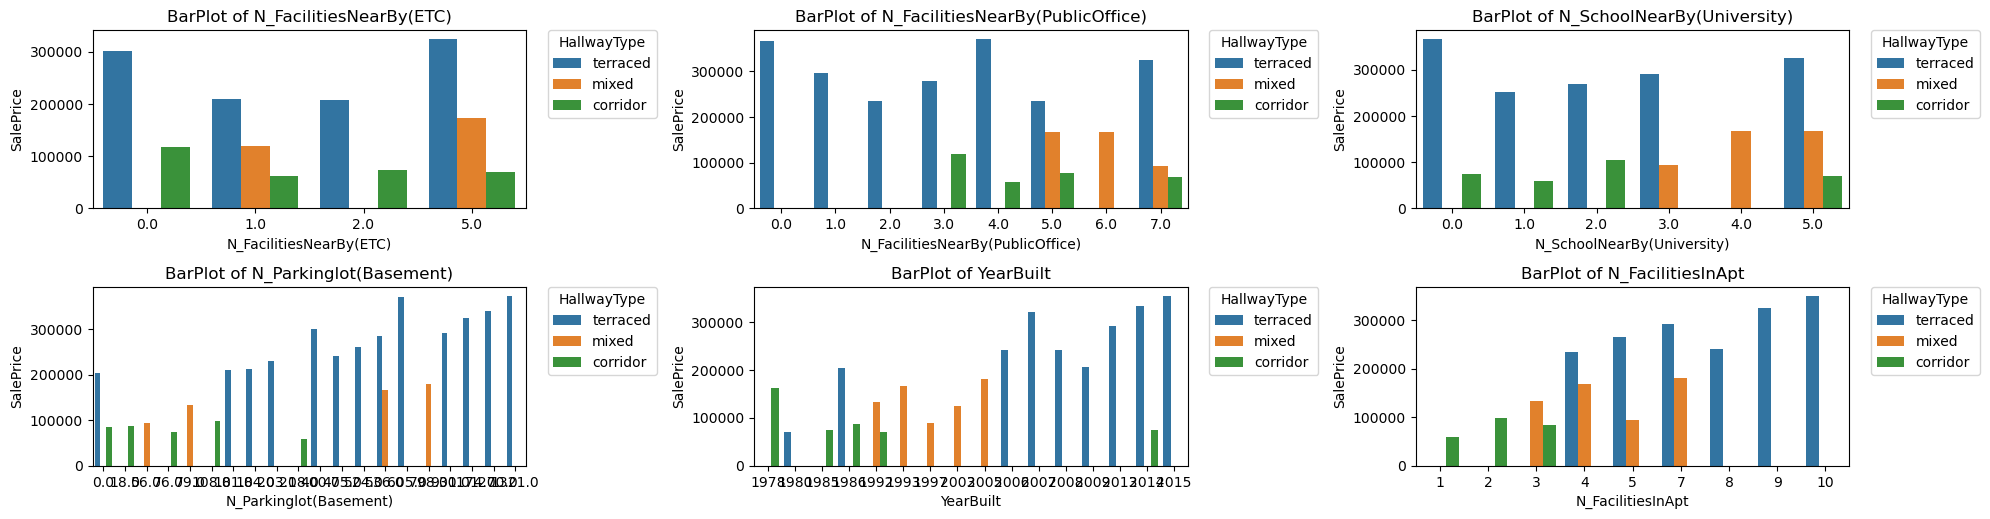

In [372]:
plt.figure(figsize=(20,10))
a = 1 

for i in list(df.describe().columns)[:-2]:
    plt.subplot(4,3,a)
    sns.barplot(data=df,x=i,y='SalePrice', hue=list(df.describe(include='object').columns)[0],estimator=np.median,ci=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=list(df.describe(include='object').columns)[0])
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

***Barplot hue by TimeToSubway***

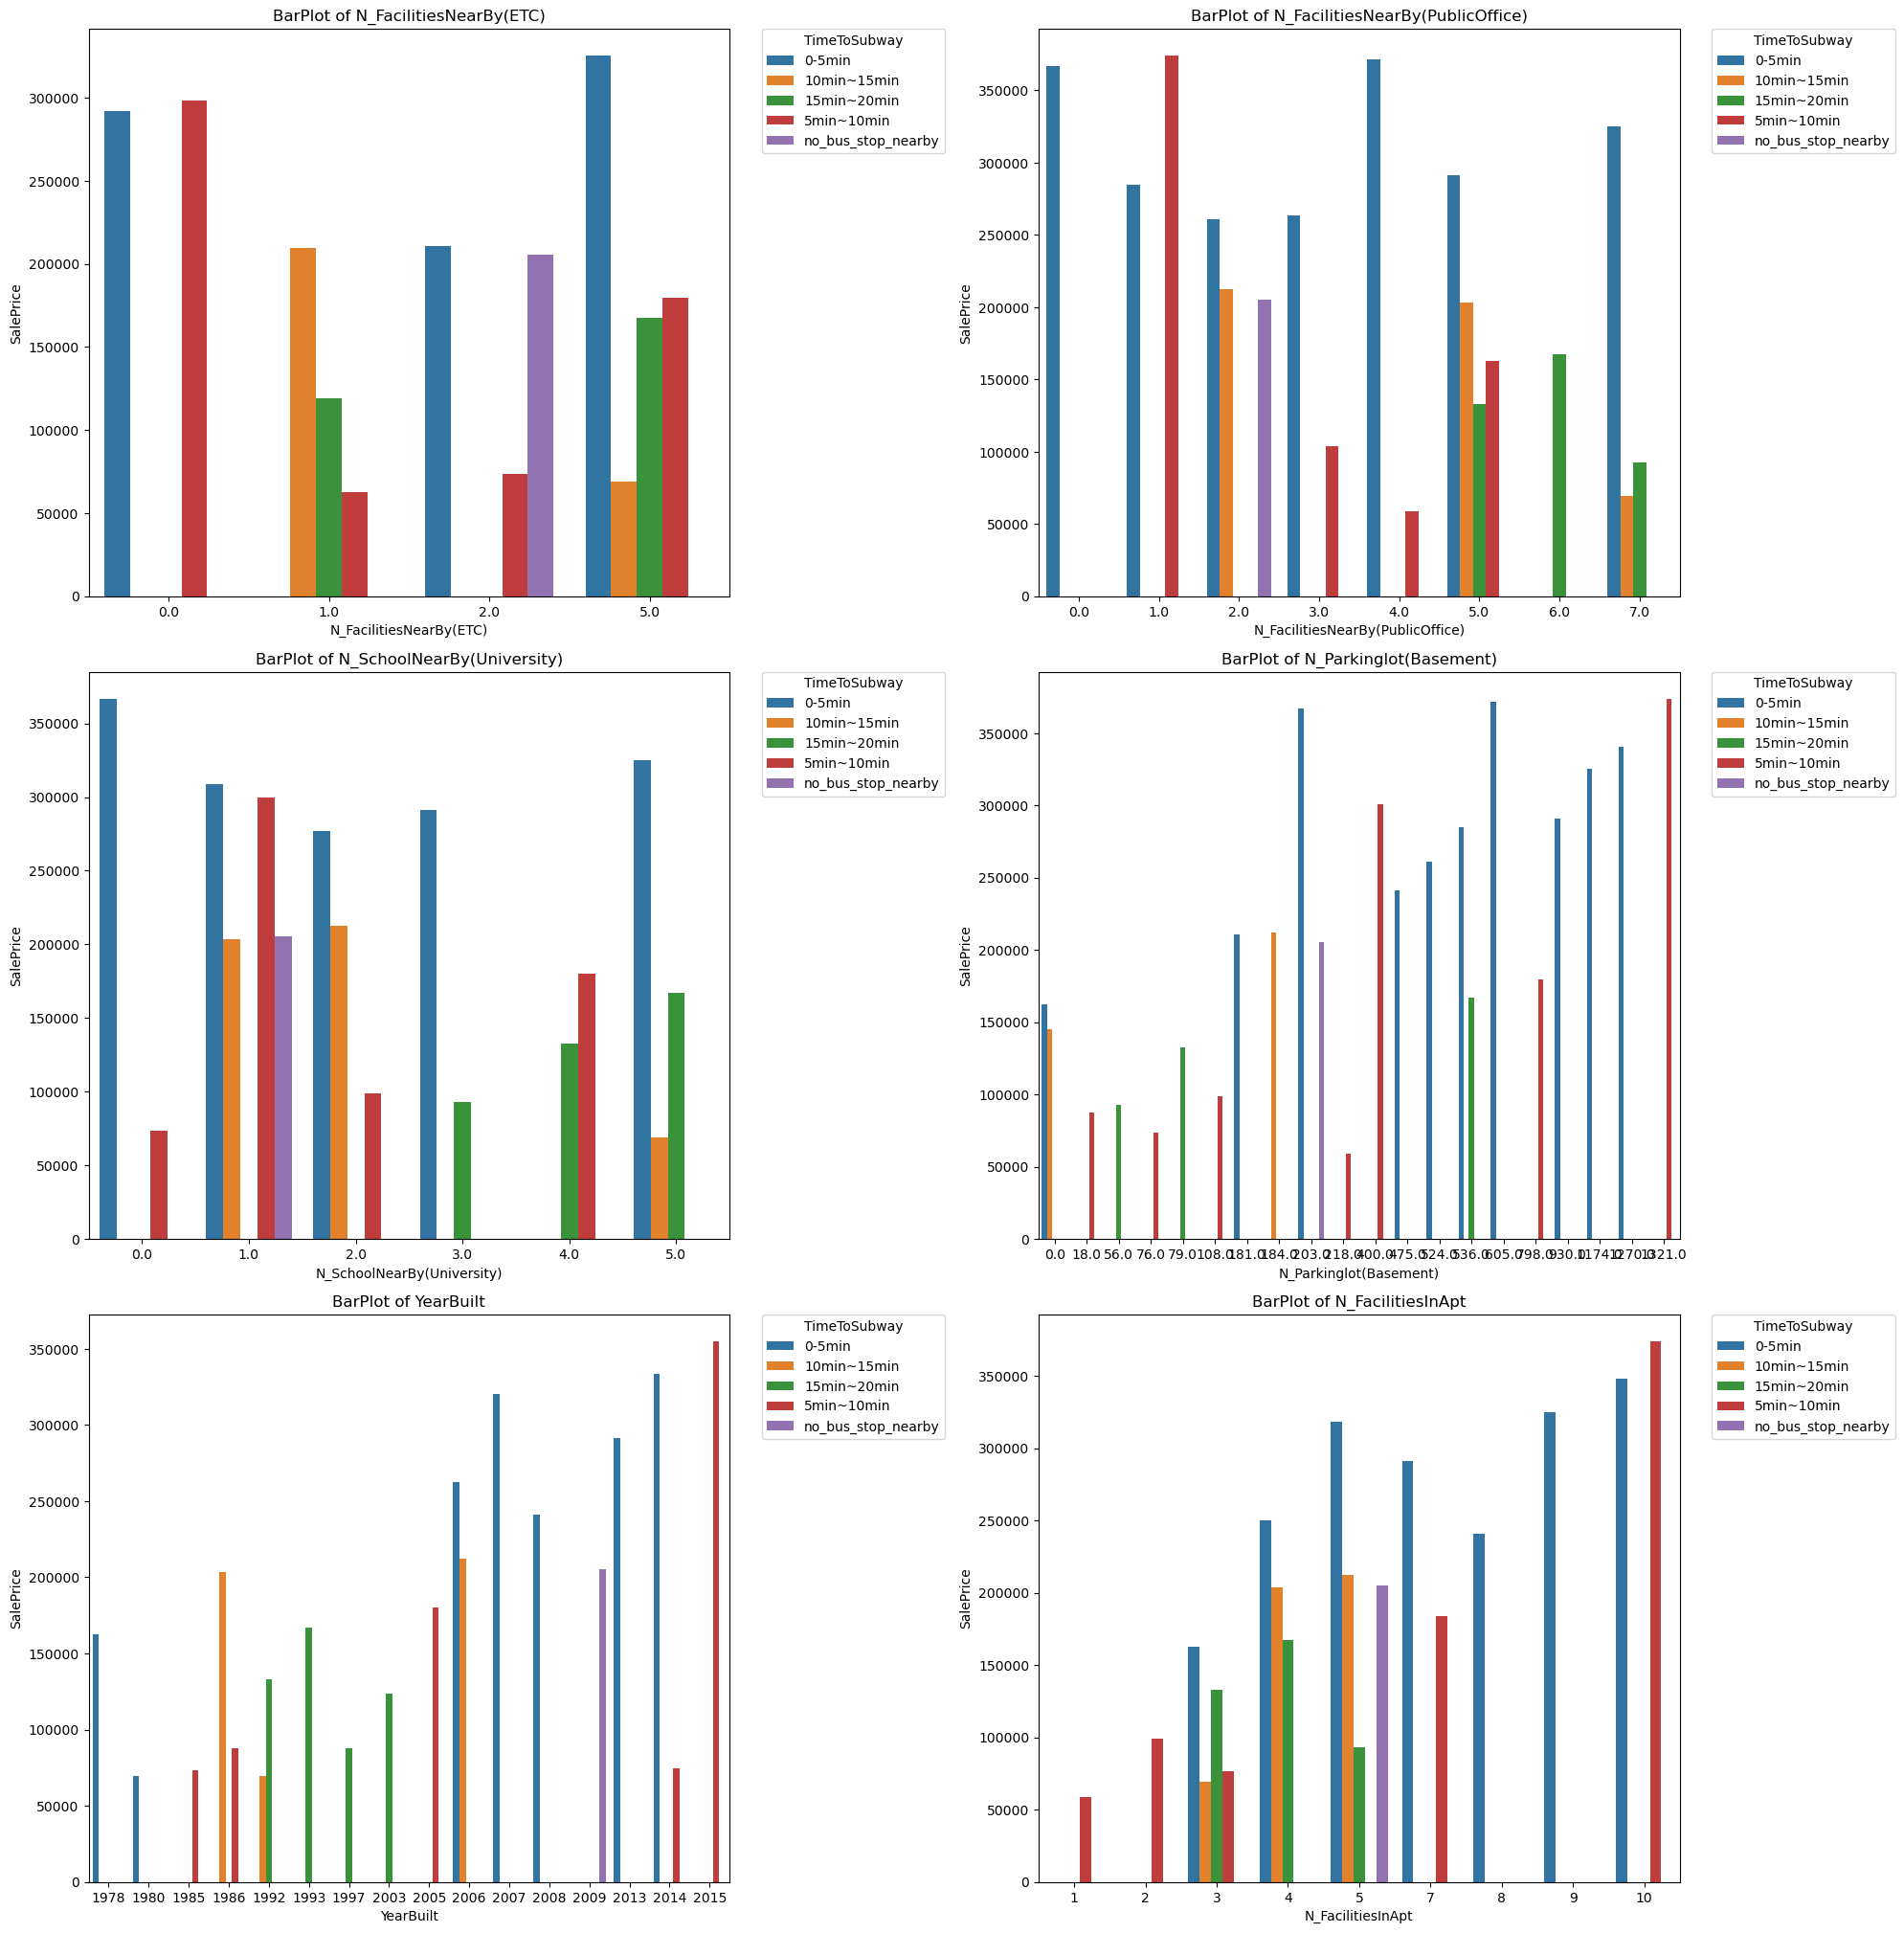

In [373]:
plt.figure(figsize=(20,40))
a = 1 

for i in list(df.describe().columns)[:-2]:
    plt.subplot(6,2,a)
    sns.barplot(data=df,x=i,y='SalePrice', hue=list(df.describe(include='object').columns)[1],estimator=np.median,ci=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=list(df.describe(include='object').columns)[1])
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

***Barplot hue by SubwayStation***

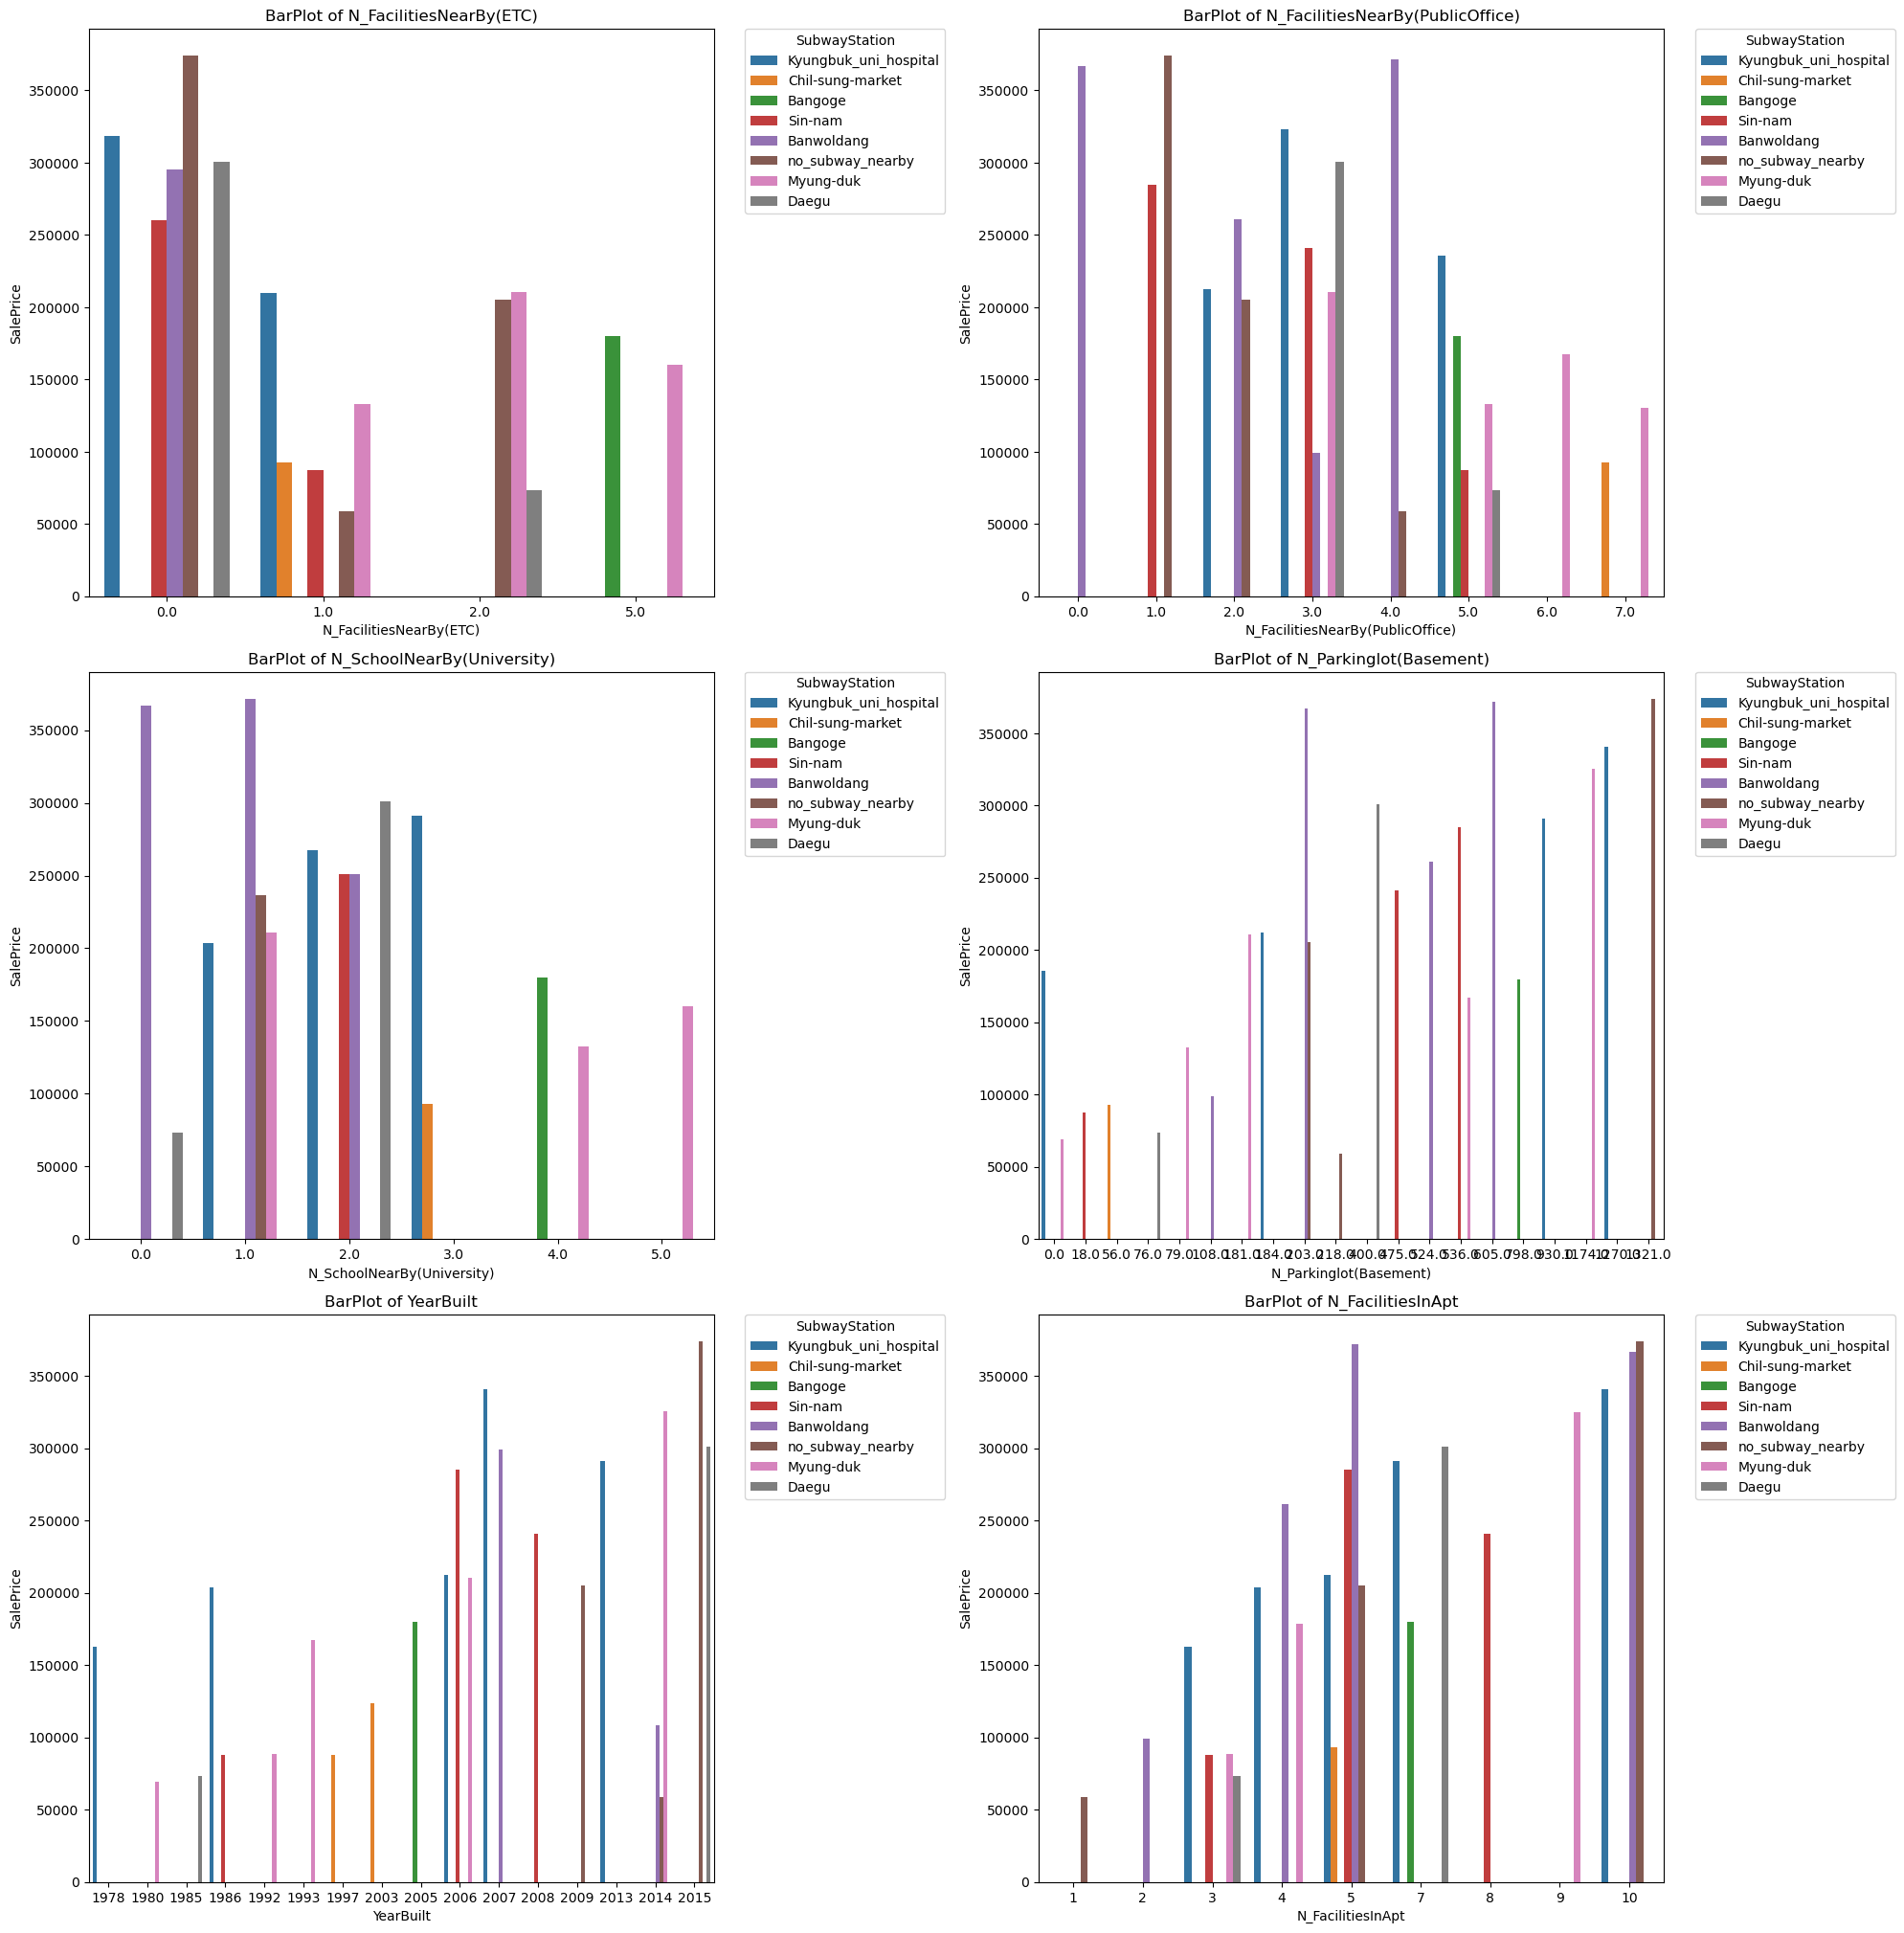

In [374]:
plt.figure(figsize=(20,40))
a = 1 

for i in list(df.describe().columns)[:-2]:
    plt.subplot(6,2,a)
    sns.barplot(data=df,x=i,y='SalePrice', hue=list(df.describe(include='object').columns)[2],estimator=np.median,ci=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=list(df.describe(include='object').columns)[2])
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

In [288]:
# categorization for size(sqf)
dfzz = df.copy()
dfzz['Size Category'] = np.select([dfzz['Size(sqf)']<500,dfzz['Size(sqf)']<1000,dfzz['Size(sqf)']<1500,dfzz['Size(sqf)']<2000],['<500','<1000','<1500','<2000',],['>=2000'])
dfzz

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Size Category
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,<1500
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,<1000
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,<1000
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,<1000
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,<2000
...,...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265,<1000
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132,<2000
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008,<1000
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477,<1500


***Barplot for size after categorization***

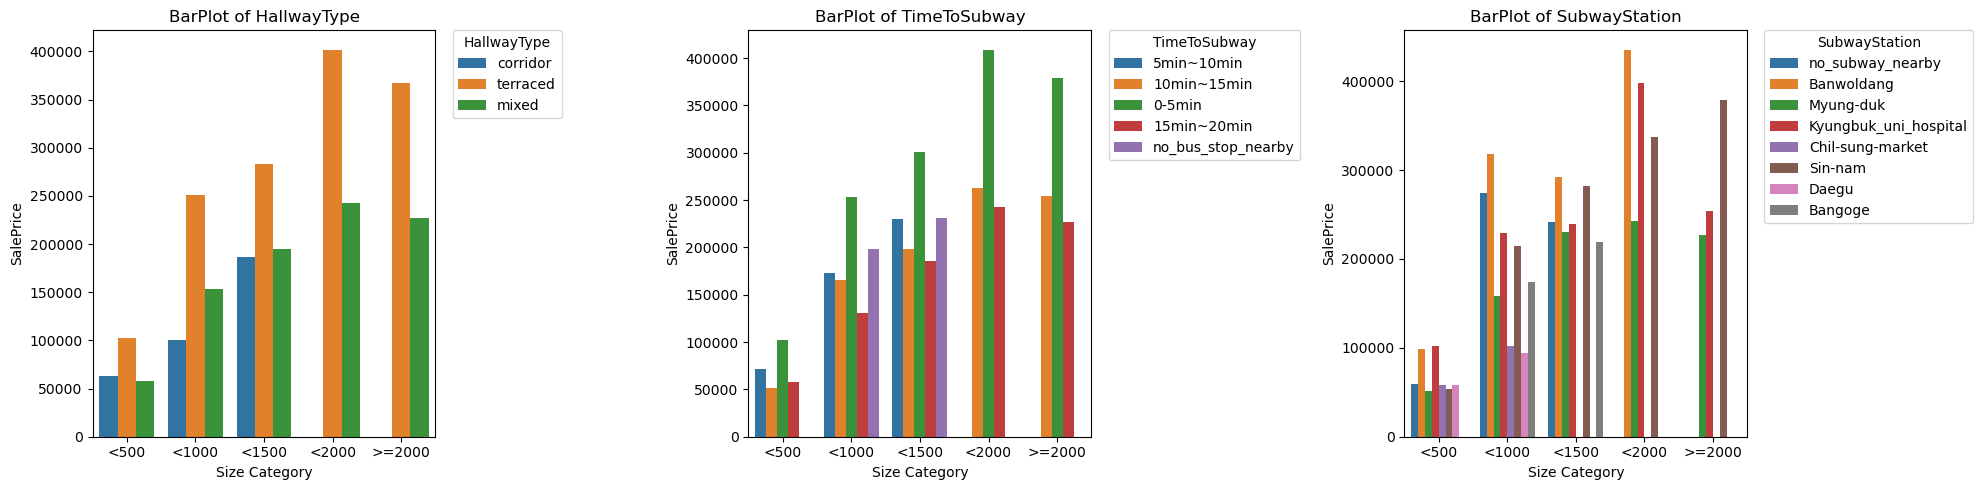

In [375]:
plt.figure(figsize=(20,5))
a = 1 

for i in list(dfzz.describe(include='object'))[:-1]:
    plt.subplot(1,3,a)
    sns.barplot(data=dfzz.sort_values('Size(sqf)'),x=list(dfzz.columns)[-1],y='SalePrice', hue=i,estimator=np.median,ci=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=i)
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

In [383]:
pd.Series(dfzz.columns)

0     HallwayType                     
1     TimeToSubway                    
2     SubwayStation                   
3     N_FacilitiesNearBy(ETC)         
4     N_FacilitiesNearBy(PublicOffice)
5     N_SchoolNearBy(University)      
6     N_Parkinglot(Basement)          
7     YearBuilt                       
8     N_FacilitiesInApt               
9     Size(sqf)                       
10    SalePrice                       
11    Size Category                   
dtype: object

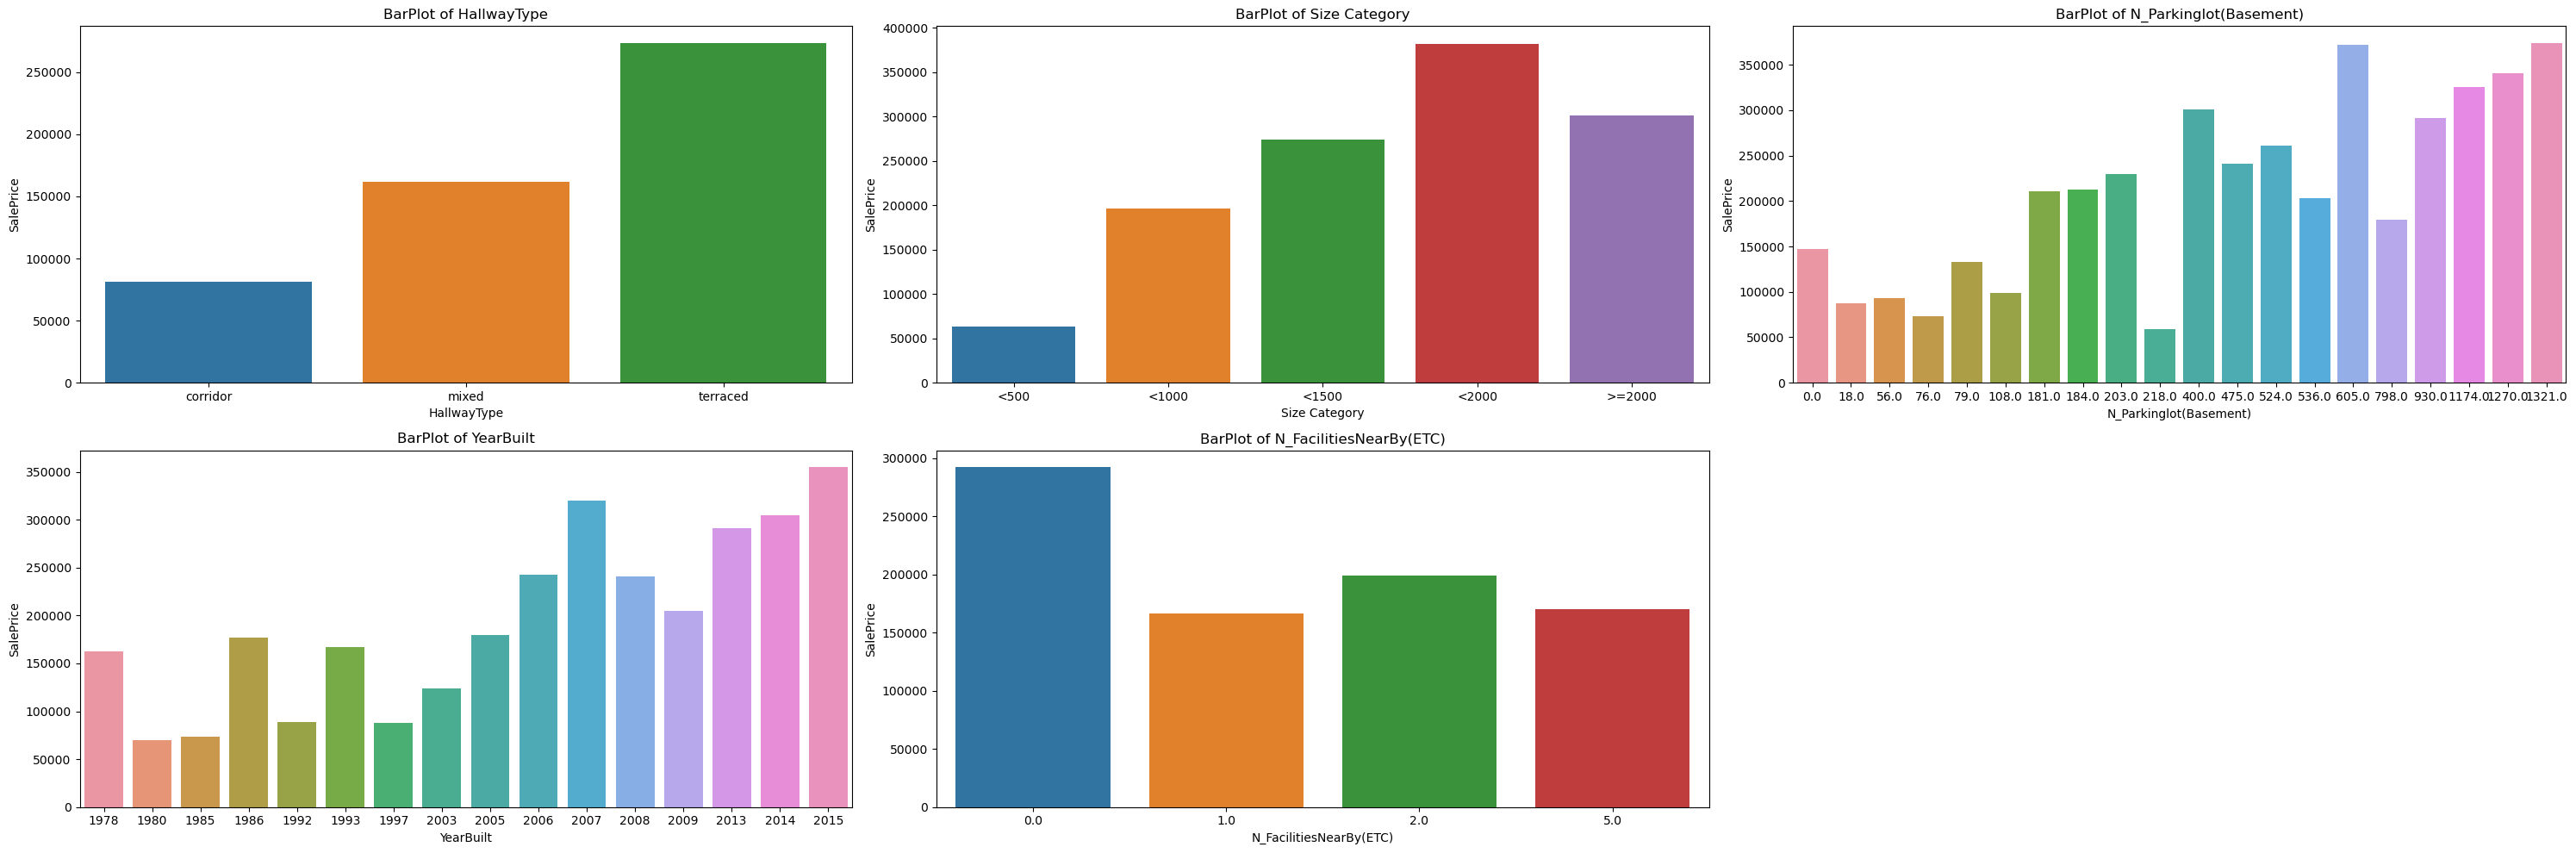

In [391]:
plt.figure(figsize=(30,10))
a = 1 

for i in pd.Series(dfzz.columns)[[0,11,6,7,3]] :
    plt.subplot(2,3,a)
    sns.barplot(data=dfzz.sort_values('SalePrice'),x=i,y='SalePrice',estimator=np.median,ci=0)
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

## Define X y

In [20]:
# features / explanatory variable
X =  df.drop(columns='SalePrice')

# target / response variable 
y = df['SalePrice']

## Splitting Data

Split the data first before fitting to prevent information leakage to machine learning (fitting machine learning from test set)

In [21]:
# split the data into 80% for train and 20% for test without statification since the target is continuous
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [22]:
# mapping ordinal encoder and giving max point for better category (in this case the shorter time needed to get to subway is better)
ordinal_mapping =  [
    {'col':'TimeToSubway', 'mapping' : {None:0,'no_bus_stop_nearby':0,'0-5min':4, '10min~15min':3, '15min~20min':2, '5min~10min':1}}
]

## Features Selection

Since the features on dataset already trimmed into 10 features to minimuze potency of underfitting, all the feature will be used

## Preprocessing Data

In [23]:
# creating pipeline for every preprocessing

# for the first try, we used the robust scaler for scaling since the robust scaler is more robust to outlier and 
# fitting median of the data into 0 and squeeze IQR near to 1

pipe_scale = Pipeline([
    ('robust', RobustScaler())
])


# bining is used to group the data into smaller category and improve the fitting for machine learning therefore prediction of machine learning will be more robust and accurate
# for the default data we will bin the data into 5 category
pipe_bin_scale = Pipeline([
    ('bin',KBinsDiscretizer(strategy='uniform', n_bins=5, encode='ordinal')),
    ('robust', RobustScaler())  
])

# ordinal enconding is used for the data with different level therefore the machine learning could interpret the data ordinally
pipe_ordinal_scale = Pipeline([
    ('ordinal',OrdinalEncoder(cols=['TimeToSubway'],mapping= ordinal_mapping)),
    ('robust', RobustScaler())
])


In [24]:
# columns with numerical category
list(X.describe().columns)

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)']

In [25]:
# columntransformer to determine which feature or columns that need preprocessing
# remainder 'passthrough' to keep the columns that is not transformed in the dataframe

transformer = ColumnTransformer([
    ('poly',PolynomialFeatures(degree=1),list(X.describe().columns)),   # polynomial for numerical columns only
    ('scale', pipe_scale,['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','N_FacilitiesInApt']), # scaling for numerical columns only
    ('binsc', pipe_bin_scale,['Size(sqf)','N_FacilitiesInApt']), # bining for columns for many unique values
    ('ordinalsc', pipe_ordinal_scale,['TimeToSubway']), # convert data to ordinal (better value will be given higher score)
    ('one', OneHotEncoder(),['HallwayType','SubwayStation'])    # onehot since unique value is less and not need to be scaled to prevent unnecessary data
], remainder = 'passthrough')

In [303]:
# ?BaggingRegressor

## Cross Validation Process

In [27]:
# define algorithm model for cross validation
linreg =  LinearRegression()
knn =  KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=26)
vote = VotingRegressor([
    ('vote1',linreg),
    ('vote2',knn),
    ('vote3',tree)
])
stack = StackingRegressor([
    ('stack1',linreg),
    ('stack2',knn),
    ('stack3',tree)
])
baglg = BaggingRegressor(base_estimator=LinearRegression())
bagknn = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3))
ranfor = RandomForestRegressor(random_state=26)
adaboost = AdaBoostRegressor(random_state=26)
gboost = GradientBoostingRegressor(random_state=26)
lasso = Lasso(random_state=26)
ridge = Ridge(random_state=26)


In [28]:
# define scoring for each metrics
scoring_reg = {
    'MAE' : 'neg_mean_absolute_error',          
    'MAPE': 'neg_mean_absolute_percentage_error',
    'RMSE': 'neg_root_mean_squared_error'
}

In [29]:
# cross validation
list_model = [linreg, knn, tree,vote,stack,baglg,bagknn,ranfor,adaboost,gboost,lasso,ridge]

# list for metrics MAE
list_all_MAE = []
list_mean_MAE = []
list_std_MAE = []

# list for metrics MAPE
list_all_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# list for metrics RMSE
list_all_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []

# looping to append every model cross validaition score 
for model in list_model:

    pipe_model = Pipeline([
        ('prep', transformer),
        ('model', model)
    ])

    model_cv = cross_validate(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        scoring=scoring_reg,        # determine scoring methods for cross validation
        cv= 5,                      # cross validate model with 5 validation set
        error_score='raise'
    )


    # MAE
    list_all_MAE.append(model_cv['test_MAE'].round(4))
    list_mean_MAE.append(model_cv['test_MAE'].mean())
    list_std_MAE.append(model_cv['test_MAE'].std())
  
    
    # MAPE
    list_all_MAPE.append(model_cv['test_MAPE'].round(4))
    list_mean_MAPE.append(model_cv['test_MAPE'].mean())
    list_std_MAPE.append(model_cv['test_MAPE'].std())
    
    # RMSE
    list_all_RMSE.append(model_cv['test_RMSE'].round(4))
    list_mean_RMSE.append(model_cv['test_RMSE'].mean())
    list_std_RMSE.append(model_cv['test_RMSE'].std())
    


MAE

In [30]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame({
    'model': list_model,
    'mean MAE' : list_mean_MAE,
    'std MAE' : list_std_MAE,
    'all result MAE' : list_all_MAE
}).sort_values(['mean MAE','std MAE'],ascending=False)

,model,mean MAE,std MAE,all result MAE
9,GradientBoostingRegressor(random_state=26),-37678.219712,1887.423173,"[-39997.2622, -37128.8097, -37856.8242, -38962.6747, -34445.5277]"
7,RandomForestRegressor(random_state=26),-37706.086123,1782.179883,"[-39668.4134, -37397.356, -38059.699, -38915.544, -34489.4182]"
2,DecisionTreeRegressor(random_state=26),-37777.825147,1792.793415,"[-39651.3157, -37702.12, -38095.3879, -38980.3112, -34459.9909]"
4,"StackingRegressor(estimators=[('stack1', LinearRegression()),\n ('stack2', KNeighborsRegressor()),\n ('stack3',\n DecisionTreeRegressor(random_state=26))])",-37893.938055,1810.935956,"[-40095.6368, -37616.525, -38268.2958, -38829.2009, -34660.0318]"
6,BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)),-38608.708302,1959.080547,"[-41121.1721, -39080.1087, -38209.4047, -39456.0389, -35176.8171]"
3,"VotingRegressor(estimators=[('vote1', LinearRegression()),\n ('vote2', KNeighborsRegressor()),\n ('vote3', DecisionTreeRegressor(random_state=26))])",-38630.067860,1718.653476,"[-41146.6992, -38732.9488, -38654.2307, -38878.2204, -35738.2402]"
1,KNeighborsRegressor(),-40205.136019,1033.823960,"[-41274.6463, -41164.4648, -39352.9657, -40581.5106, -38652.0926]"
0,LinearRegression(),-41510.473862,2036.054315,"[-44867.1648, -40515.0634, -41546.6976, -41984.1519, -38639.2917]"
10,Lasso(random_state=26),-41511.646495,2035.374471,"[-44866.0031, -40517.6411, -41549.1952, -41985.6608, -38639.7322]"
5,BaggingRegressor(base_estimator=LinearRegression()),-41536.275009,2023.259303,"[-44860.2813, -40720.272, -41271.6368, -42170.5304, -38658.6546]"


MAPE

In [31]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame({
    'model': list_model,
    'mean MAPE' : list_mean_MAPE,
    'std MAPE' : list_std_MAPE,
    'all result MAPE' : list_all_MAPE
}).sort_values(['mean MAPE','std MAPE'],ascending=False)

,model,mean MAPE,std MAPE,all result MAPE
7,RandomForestRegressor(random_state=26),-0.192051,0.003931,"[-0.1946, -0.1932, -0.1945, -0.1843, -0.1937]"
9,GradientBoostingRegressor(random_state=26),-0.192252,0.004835,"[-0.1976, -0.1914, -0.1939, -0.1834, -0.1949]"
2,DecisionTreeRegressor(random_state=26),-0.192950,0.004275,"[-0.1952, -0.197, -0.1944, -0.1847, -0.1935]"
4,"StackingRegressor(estimators=[('stack1', LinearRegression()),\n ('stack2', KNeighborsRegressor()),\n ('stack3',\n DecisionTreeRegressor(random_state=26))])",-0.194019,0.004900,"[-0.1978, -0.1975, -0.1958, -0.1845, -0.1945]"
6,BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)),-0.195827,0.005725,"[-0.1997, -0.2045, -0.1954, -0.1889, -0.1907]"
3,"VotingRegressor(estimators=[('vote1', LinearRegression()),\n ('vote2', KNeighborsRegressor()),\n ('vote3', DecisionTreeRegressor(random_state=26))])",-0.199043,0.006716,"[-0.2018, -0.2065, -0.1995, -0.1864, -0.2009]"
1,KNeighborsRegressor(),-0.206273,0.009266,"[-0.1979, -0.217, -0.2038, -0.1954, -0.2172]"
0,LinearRegression(),-0.215350,0.006360,"[-0.2226, -0.22, -0.2164, -0.2042, -0.2136]"
10,Lasso(random_state=26),-0.215357,0.006353,"[-0.2225, -0.22, -0.2164, -0.2042, -0.2136]"
11,Ridge(random_state=26),-0.215527,0.006382,"[-0.2228, -0.2199, -0.2169, -0.2043, -0.2138]"


RMSE

In [32]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame({
    'model': list_model,
    'mean RMSE' : list_mean_RMSE,
    'std RMSE' : list_std_RMSE,
    'all result RMSE' : list_all_RMSE
}).sort_values(['mean RMSE','std RMSE'],ascending=False)

,model,mean RMSE,std RMSE,all result RMSE
9,GradientBoostingRegressor(random_state=26),-46427.808259,2547.999548,"[-49036.5561, -45161.4777, -46527.8908, -49097.8657, -42315.2511]"
7,RandomForestRegressor(random_state=26),-46663.024515,2476.207853,"[-49093.9621, -46041.6765, -46696.7913, -49107.5292, -42375.1635]"
4,"StackingRegressor(estimators=[('stack1', LinearRegression()),\n ('stack2', KNeighborsRegressor()),\n ('stack3',\n DecisionTreeRegressor(random_state=26))])",-46734.094246,2347.395644,"[-49171.5013, -46476.1762, -46953.8684, -48585.4727, -42483.4526]"
2,DecisionTreeRegressor(random_state=26),-46853.388928,2452.523284,"[-49054.0368, -46970.0484, -46792.5054, -49091.8119, -42358.5422]"
3,"VotingRegressor(estimators=[('vote1', LinearRegression()),\n ('vote2', KNeighborsRegressor()),\n ('vote3', DecisionTreeRegressor(random_state=26))])",-47585.306844,2191.956560,"[-50145.7496, -47525.2278, -47585.4893, -49012.4884, -43657.5792]"
6,BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)),-48827.675940,2325.674277,"[-50660.97, -50353.4844, -48196.8448, -50399.1038, -44527.9768]"
8,AdaBoostRegressor(random_state=26),-51122.868769,1779.670478,"[-52988.4755, -51551.3834, -50881.5293, -52333.3082, -47859.6474]"
1,KNeighborsRegressor(),-51138.508092,2208.748183,"[-51588.6178, -54112.2925, -49177.6775, -52690.8016, -48123.1511]"
11,Ridge(random_state=26),-51705.413174,2368.389764,"[-54999.5785, -50575.6774, -52838.703, -52200.9299, -47912.1771]"
10,Lasso(random_state=26),-51712.282304,2359.201529,"[-55017.9406, -50550.8454, -52809.3835, -52224.2402, -47959.0018]"


Based on cross validation above, there are 2 best algorithm (have best performance {lowest mean} and quite stable {low standard deviation} )that suitable with the data which are **Gradient Boosting and Random Forest after measured by metrics MAE, MAPE and RMSE**. 

Furthermore, I will choose **Random Forest algorithm to be tuned** since the mean between Gradient Boosting and Random Forest is similar but in **MAE, MAPE and RMSE metrics describe that the ML stability is more stable in Random Forest algorithm (lower standard deviation than Gradient Boosting)**

## Hyperparameter Tuning (RANDOM FOREST)

### Tuning 1

In [33]:
np.linspace(0.8,1,21)

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [34]:
list(X.describe().columns)

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)']

In [35]:
pipe_scale = Pipeline([
    ('robust', RobustScaler())
])

pipe_bin_scale = Pipeline([
    ('bin',KBinsDiscretizer(strategy='uniform', n_bins=5, encode='ordinal')),
    ('robust', RobustScaler())  
])

pipe_ordinal_scale = Pipeline([
    ('ordinal',OrdinalEncoder(cols=['TimeToSubway'],mapping= ordinal_mapping)),
    ('robust', RobustScaler())
])


transformer = ColumnTransformer([
    ('scale', pipe_scale,['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','N_FacilitiesInApt']),
    ('binsc', pipe_bin_scale,['Size(sqf)','N_FacilitiesInApt']),
    ('ordinalsc', pipe_ordinal_scale,['TimeToSubway']),
    ('poly',PolynomialFeatures(degree=1),list(X.describe().columns)),
    ('one', OneHotEncoder(),['HallwayType','SubwayStation'])
], remainder = 'passthrough')

In [37]:
np.linspace(0.05,1,20)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [403]:
# combination
4*2*46*50*20*2*2*3*3*3

39744000

In [39]:
# estimator
pipe_model  = Pipeline([
    ('prep', transformer),
    ('model', ranfor)
])

# param_distributions
hyperparam_space = {
    'model__n_estimators': [1, 10, 100, 500],           # number of tree (more tree will lead to heavier computation and better, lesser tree will cause overfitting)
    'model__criterion': ['absolute_error','squared_error'], # measurement to find the best splitter
    'model__max_depth': range(5,51),    # n times tree need to split
    'model__min_samples_split': range(2,51),    # min sample req for split to occur
    'model__min_impurity_decrease': np.linspace(0.05,1,20), # parameter that defines quality of the data (o purity means that the data already homogeneous)
    'prep__poly__degree': range(1,3),   # polynomial feature
    'prep__binsc__bin__strategy': ['uniform','quantile'],   # strategy to binning the data 'uniform' (same range / width for every bin) and 'quantile' (same frequency for every bin)
    'prep__scale': [RobustScaler(),MinMaxScaler(),StandardScaler()], # robust --> median 0 and IQR near to 1    # standard --> mean 0 and std near to 1     # minmax --> scaling based on min and max values
    'prep__binsc__robust': [RobustScaler(),MinMaxScaler(),StandardScaler()],
    'prep__ordinalsc__robust': [RobustScaler(),MinMaxScaler(),StandardScaler()]
}

# randomized search
randomsearch = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv = 5,
    scoring= 'neg_mean_absolute_error',     # used mean absoluted error since the error of the data will not lead higher effect to apartment prices and to minimized error measurement from outliers
    n_jobs= -1, 
    n_iter= 500,            # iteration 500 times
    random_state= 26,
    error_score='raise'
) 

In [40]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scale',
                                                                               Pipeline(steps=[('robust',
                                                                                                RobustScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                               

In [41]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__scale,param_prep__poly__degree,param_prep__ordinalsc__robust,param_prep__binsc__robust,param_prep__binsc__bin__strategy,param_model__n_estimators,...,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
335,50.578667,17.939762,0.062893,0.005646,RobustScaler(),1,StandardScaler(),RobustScaler(),quantile,500,...,absolute_error,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 4, 'model__min_impurity_decrease': 0.95, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-39524.802366,-36913.969574,-37732.061551,-38888.102794,-34466.140562,-37505.015369,1767.943185,1
380,23.155151,17.718389,0.023016,0.006475,StandardScaler(),1,MinMaxScaler(),StandardScaler(),quantile,100,...,absolute_error,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_impurity_decrease': 0.15, 'model__max_depth': 22, 'model__criterion': 'absolute_error'}",-39536.655104,-37007.035845,-38056.402558,-39086.872454,-34109.012488,-37559.195690,1933.908029,2
42,15.446979,13.777177,0.047024,0.039614,StandardScaler(),1,MinMaxScaler(),StandardScaler(),quantile,100,...,absolute_error,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.5499999999999999, 'model__max_depth': 19, 'model__criterion': 'absolute_error'}",-39530.068796,-37068.250035,-38054.304398,-39092.468565,-34052.897593,-37559.597877,1950.156523,3
246,9.664606,2.541852,0.065848,0.077064,StandardScaler(),1,RobustScaler(),MinMaxScaler(),quantile,100,...,absolute_error,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': RobustScaler(), 'prep__binsc__robust': MinMaxScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.3, 'model__max_depth': 36, 'model__criterion': 'absolute_error'}",-39531.582072,-37068.422037,-38076.018519,-39098.708900,-34037.530069,-37562.452319,1958.083210,4
90,14.348133,6.980662,0.033412,0.012786,RobustScaler(),1,MinMaxScaler(),RobustScaler(),quantile,100,...,absolute_error,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 9, 'model__min_impurity_decrease': 0.05, 'model__max_depth': 12, 'model__criterion': 'absolute_error'}",-39577.516840,-37056.541759,-38093.780428,-39069.617789,-34031.769572,-37565.845278,1966.517274,5


In [313]:
best_model = randomsearch.best_estimator_

In [315]:
best_params = randomsearch.best_params_
best_params

{'prep__scale': RobustScaler(),
 'prep__poly__degree': 1,
 'prep__ordinalsc__robust': StandardScaler(),
 'prep__binsc__robust': RobustScaler(),
 'prep__binsc__bin__strategy': 'quantile',
 'model__n_estimators': 500,
 'model__min_samples_split': 4,
 'model__min_impurity_decrease': 0.95,
 'model__max_depth': 7,
 'model__criterion': 'absolute_error'}

In [316]:
best_score = randomsearch.best_score_
best_score

-37505.015369444445

### Tuning 2 times (RANDOM FOREST)

Smaller range parameter for tuning based on tuning 1 best_esimator (increase parameter accuracy by using smaller increment for parameter range), therefore ML could be more precise or making less error than tuning 1.

In [306]:
best_params

{'prep__scale': StandardScaler(),
 'prep__poly__degree': 1,
 'prep__ordinalsc__robust': StandardScaler(),
 'prep__binsc__robust': StandardScaler(),
 'prep__binsc__bin__strategy': 'uniform',
 'model__n_estimators': 100,
 'model__min_samples_split': 7,
 'model__min_impurity_decrease': 0.6102564102564103,
 'model__max_depth': 8,
 'model__criterion': 'absolute_error'}

In [77]:
# estimator
pipe_model  = Pipeline([
    ('prep', transformer),
    ('model', ranfor)
])

# param_distributions
hyperparam_space = {
    'model__n_estimators': [100,500], 
    'model__criterion': ['absolute_error','squared_error'], 
    'model__max_depth': range(5,21),
    'model__min_samples_split': range(2,26),
    'model__min_impurity_decrease': np.linspace(0.05,1,40),
    'prep__poly__degree': [1], 
    'prep__binsc__bin__strategy': ['uniform','quantile'],
    'prep__scale': [RobustScaler(),MinMaxScaler(),StandardScaler()],
    'prep__binsc__robust': [RobustScaler(),MinMaxScaler(),StandardScaler()],
    'prep__ordinalsc__robust': [RobustScaler(),MinMaxScaler(),StandardScaler()]
}

# randomized search
randomsearch_t2 = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv = 5,
    scoring= 'neg_mean_absolute_error',
    n_jobs= -1, 
    n_iter= 500,
    random_state= 26,
    error_score='raise'
) 

In [78]:
randomsearch_t2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scale',
                                                                               Pipeline(steps=[('robust',
                                                                                                RobustScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                               

In [79]:
pd.DataFrame(randomsearch_t2.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__scale,param_prep__poly__degree,param_prep__ordinalsc__robust,param_prep__binsc__robust,param_prep__binsc__bin__strategy,param_model__n_estimators,...,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,22.347980,27.881297,0.117409,0.192596,StandardScaler(),1,StandardScaler(),StandardScaler(),uniform,100,...,absolute_error,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'uniform', 'model__n_estimators': 100, 'model__min_samples_split': 7, 'model__min_impurity_decrease': 0.6102564102564103, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39418.460660,-37037.564317,-37877.402951,-39026.570775,-34071.496447,-37486.299030,1903.727261,1
359,8.322015,0.096084,0.023002,0.006648,RobustScaler(),1,StandardScaler(),StandardScaler(),uniform,100,...,absolute_error,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'uniform', 'model__n_estimators': 100, 'model__min_samples_split': 4, 'model__min_impurity_decrease': 0.9025641025641026, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39453.939653,-36853.569109,-37896.174132,-39096.031470,-34153.054225,-37490.553718,1904.816176,2
36,76.584068,40.523338,0.071941,0.013296,StandardScaler(),1,RobustScaler(),RobustScaler(),quantile,500,...,absolute_error,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': RobustScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__min_impurity_decrease': 0.14743589743589744, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39466.678167,-36984.826711,-37982.159317,-38877.057074,-34163.074310,-37494.759116,1865.311022,3
256,57.235851,19.647330,0.332024,0.523587,RobustScaler(),1,StandardScaler(),StandardScaler(),quantile,500,...,absolute_error,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.2205128205128205, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39470.794109,-36988.596910,-37946.613986,-38920.511569,-34157.516424,-37496.806600,1872.699932,4
321,20.005580,14.212770,0.070222,0.092079,MinMaxScaler(),1,StandardScaler(),StandardScaler(),quantile,100,...,absolute_error,"{'prep__scale': MinMaxScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 6, 'model__min_impurity_decrease': 0.2205128205128205, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-39421.438657,-37024.828333,-37641.016447,-38953.246157,-34448.700116,-37497.845942,1752.708330,5


In [317]:
best_model2 = randomsearch_t2.best_estimator_

In [318]:
best_params2 = randomsearch_t2.best_params_
best_params2

{'prep__scale': StandardScaler(),
 'prep__poly__degree': 1,
 'prep__ordinalsc__robust': StandardScaler(),
 'prep__binsc__robust': StandardScaler(),
 'prep__binsc__bin__strategy': 'uniform',
 'model__n_estimators': 100,
 'model__min_samples_split': 7,
 'model__min_impurity_decrease': 0.6102564102564103,
 'model__max_depth': 8,
 'model__criterion': 'absolute_error'}

In [319]:
best_score2 = randomsearch_t2.best_score_
best_score2

-37486.29903009259

### Comparison between RANDOM FOREST Tuning 1 and Tuning 2

In [320]:
display('RANDOM FOREST Tuning 1',
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score').head().iloc[:,-9:],
'RANDOM FOREST Tuning 2',
pd.DataFrame(randomsearch_t2.cv_results_).sort_values('rank_test_score').head().iloc[:,-9:])

'RANDOM FOREST Tuning 1'

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
335,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 4, 'model__min_impurity_decrease': 0.95, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-39524.802366,-36913.969574,-37732.061551,-38888.102794,-34466.140562,-37505.015369,1767.943185,1
380,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_impurity_decrease': 0.15, 'model__max_depth': 22, 'model__criterion': 'absolute_error'}",-39536.655104,-37007.035845,-38056.402558,-39086.872454,-34109.012488,-37559.195690,1933.908029,2
42,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.5499999999999999, 'model__max_depth': 19, 'model__criterion': 'absolute_error'}",-39530.068796,-37068.250035,-38054.304398,-39092.468565,-34052.897593,-37559.597877,1950.156523,3
246,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': RobustScaler(), 'prep__binsc__robust': MinMaxScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.3, 'model__max_depth': 36, 'model__criterion': 'absolute_error'}",-39531.582072,-37068.422037,-38076.018519,-39098.708900,-34037.530069,-37562.452319,1958.083210,4
90,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': MinMaxScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 9, 'model__min_impurity_decrease': 0.05, 'model__max_depth': 12, 'model__criterion': 'absolute_error'}",-39577.516840,-37056.541759,-38093.780428,-39069.617789,-34031.769572,-37565.845278,1966.517274,5


'RANDOM FOREST Tuning 2'

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'uniform', 'model__n_estimators': 100, 'model__min_samples_split': 7, 'model__min_impurity_decrease': 0.6102564102564103, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39418.460660,-37037.564317,-37877.402951,-39026.570775,-34071.496447,-37486.299030,1903.727261,1
359,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'uniform', 'model__n_estimators': 100, 'model__min_samples_split': 4, 'model__min_impurity_decrease': 0.9025641025641026, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39453.939653,-36853.569109,-37896.174132,-39096.031470,-34153.054225,-37490.553718,1904.816176,2
36,"{'prep__scale': StandardScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': RobustScaler(), 'prep__binsc__robust': RobustScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__min_impurity_decrease': 0.14743589743589744, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39466.678167,-36984.826711,-37982.159317,-38877.057074,-34163.074310,-37494.759116,1865.311022,3
256,"{'prep__scale': RobustScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 500, 'model__min_samples_split': 8, 'model__min_impurity_decrease': 0.2205128205128205, 'model__max_depth': 8, 'model__criterion': 'absolute_error'}",-39470.794109,-36988.596910,-37946.613986,-38920.511569,-34157.516424,-37496.806600,1872.699932,4
321,"{'prep__scale': MinMaxScaler(), 'prep__poly__degree': 1, 'prep__ordinalsc__robust': StandardScaler(), 'prep__binsc__robust': StandardScaler(), 'prep__binsc__bin__strategy': 'quantile', 'model__n_estimators': 100, 'model__min_samples_split': 6, 'model__min_impurity_decrease': 0.2205128205128205, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-39421.438657,-37024.828333,-37641.016447,-38953.246157,-34448.700116,-37497.845942,1752.708330,5


Based on comparison above, I choose RANNDOM FOREST from Tuning 1 (rank_test_score 1) to be used as prediction machine learning because the

**mean_test_score difference** between from rank 1 in Tuning 1(₩ 37505.015) and Tuning 2 (₩ 37486.299) **is ₩ 18.716 with** 

**standard deviation difference** between mean_test_score from rank 1 in Tuning 1(₩ 1767.943) and Tuning 2 (₩ 1903.727) **is ₩ 135.784**

**It means that by sacrificing model performance (error) by ₩ 18.716 we could get more stable model (equal to ₩135.784)**

### Benchmark Model

MAE

In [45]:
pipe_model = Pipeline([
    ('prep', transformer),
    ('model', ranfor)
])

pipe_model.fit(X_train,y_train)
y_pred_bench =  pipe_model.predict(X_test)
mae_bench = mean_absolute_error(y_test,y_pred_bench)
mae_bench

37749.97735487744

MAPE

In [46]:
mape_bench = mean_absolute_percentage_error(y_test,y_pred_bench)
mape_bench

0.19559863906896777

RMSE

In [47]:
rmse_bench = (mean_squared_error(y_test,y_pred_bench))**0.5
rmse_bench

46420.495823600504

Variance Score

In [48]:
var_bench = explained_variance_score(y_test,y_pred_bench)
var_bench

0.8086635802953575

R square

In [49]:
rsq_bench = r2_score(y_test,y_pred_bench)
rsq_bench

0.8084226049331157

### Tuning 1 Model

In [50]:
best_model.fit(X_train,y_train)
y_pred_tune =  best_model.predict(X_test)


MAE

In [51]:
mae_tune = mean_absolute_error(y_test,y_pred_tune)
mae_tune

36960.575950092425

MAPE

In [52]:
mape_tune = mean_absolute_percentage_error(y_test,y_pred_tune)
mape_tune

0.186105751750701

RMSE

In [53]:
rmse_tune = (mean_squared_error(y_test,y_pred_tune))**0.5
rmse_tune

47000.64451104375

Variance Score

In [54]:
var_tune = explained_variance_score(y_test,y_pred_tune)
var_tune

0.8055440613628264

R square

In [55]:
rsq_tune = r2_score(y_test,y_pred_tune)
rsq_tune

0.8036041345703021

### Comparison Metrics Benchmark and Tuning 1

In [394]:

df_metrics = pd.DataFrame(
    {'MAE':[mae_bench,mae_tune],
     'MAPE':[mape_bench*100,mape_tune*100],
     'RMSE':[rmse_bench,rmse_tune],
     'Varians Score':[var_bench,var_tune],
     'R^2':[rsq_bench,rsq_tune],
     },
    index=['Benchmark','Tuning 1']
).T
df_metrics['difference'] = df_metrics['Tuning 1']-df_metrics['Benchmark']
df_metrics

,Benchmark,Tuning 1,difference
MAE,37749.977355,36960.575950,-789.401405
MAPE,19.559864,18.610575,-0.949289
RMSE,46420.495824,47000.644511,580.148687
Varians Score,0.808664,0.805544,-0.003120
R^2,0.808423,0.803604,-0.004818


### Checking residual Benchmark and residual Tuning 1

In [329]:
# Residual plot for y_pred benchmark 
residual_test = pd.DataFrame({
    'y_test' : y_test,
    'y_pred_bench' :y_pred_bench, 
    'y_pred_tune' :y_pred_tune, 
    'residual_bench' :y_test-y_pred_bench, 
    'residual_tune' :y_test-y_pred_tune, 
})
residual_test

,y_test,y_pred_bench,y_pred_tune,residual_bench,residual_tune
297,146017,167712.425835,156950.941,-21695.425835,-10933.941
1609,420353,398584.070819,379865.530,21768.929181,40487.470
1579,203539,216368.092954,204831.688,-12829.092954,-1292.688
818,270796,210443.663927,202027.564,60352.336073,68768.436
2873,203539,243016.941890,230953.407,-39477.941890,-27414.407
...,...,...,...,...,...
1624,327433,335703.333429,353690.071,-8270.333429,-26257.071
617,156637,139232.249767,139424.920,17404.750233,17212.080
2427,190265,232655.506817,224386.969,-42390.506817,-34121.969
339,348672,358468.997103,363708.814,-9796.997103,-15036.814


#### Benchmark residual (over estimate / prediction higher than actual)

In [358]:
min_res_bench = residual_test[residual_test['residual_bench']<0]['residual_bench']

print(f'Sum ={min_res_bench.sum()}\nCount = {min_res_bench.count()}')

Sum =-10656708.391091354
Count = 302


#### Benchmark residual (under estimate / prediction lower than actual)

In [359]:
plus_res_bench = residual_test[residual_test['residual_bench']>0]['residual_bench']
print(f'Sum ={plus_res_bench.sum()}\nCount = {plus_res_bench.count()}')

Sum =9766029.357897341
Count = 239


#### Tuning 1 residual (over estimate / prediction higher than actual)

In [362]:
min_res_tune = residual_test[residual_test['residual_tune']<0]['residual_tune']
print(f'Sum ={min_res_tune.sum()}\nCount = {min_res_tune.count()}')

Sum =-8734270.807999998
Count = 278


#### Tuning 1 residual (under estimate / prediction lower than actual)

In [361]:
plus_res_tune = residual_test[residual_test['residual_tune']>0]['residual_tune']
print(f'Sum ={plus_res_tune.sum()}\nCount = {plus_res_tune.count()}')

Sum =11261400.781
Count = 263


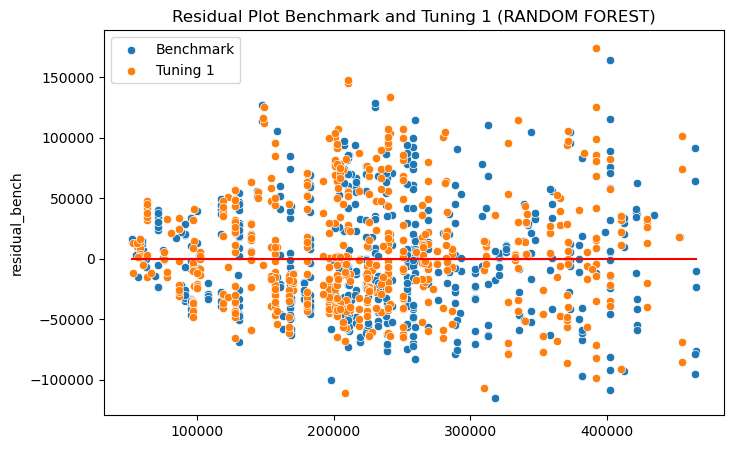

In [402]:
# residual plot (y_pred vs residual)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_bench, y=residual_test['residual_bench'])
sns.scatterplot(x=y_pred_tune, y=residual_test['residual_tune'])
plt.legend(['Benchmark','Tuning 1'])
sns.lineplot(x=y_pred_bench, y=0, color='red')
plt.title('Residual Plot Benchmark and Tuning 1 (RANDOM FOREST)');

Residual Plot Benchmark and Tuning 1 describes that the error / residuals of the data is unbiased (scattered and not making any pattern) and heteroscedasticity (tends to have small error on lower prediction and error / residuals is higher on higher price) this means that the model is better to predict apartment price < 100.000 (the price is based on prediction of benchmark model {not actual price on test set})

From this scatter plot, we could also that the RMSE value is much higher than MAE value due to some errors occured on higher value which impact to multiplication squared from MSE.

#### Feature Importances

In [363]:
feat_prep1= list(best_model[0].transformers_[0][1].get_feature_names_out())

In [213]:
best_model[0].transformers_[1]

('binsc',
 Pipeline(steps=[('bin', KBinsDiscretizer(encode='ordinal', strategy='uniform')),
                 ('robust', StandardScaler())]),
 ['Size(sqf)', 'N_FacilitiesInApt'])

In [364]:
feat_prep2 = list(best_model[0].transformers_[1][1][1].get_feature_names_out())

In [365]:
feat_prep3 = list(best_model[0].transformers_[2][1][1].get_feature_names_out())

In [366]:
feat_prep4 = list(best_model[0].transformers_[3][1].get_feature_names_out())

In [367]:
feat_prep5 = list(best_model[0].transformers_[4][1].get_feature_names_out())

In [368]:
feat_all = feat_prep1+feat_prep2+feat_prep3+feat_prep4+feat_prep5

In [369]:
pd.DataFrame(
    data= list(best_model[1].feature_importances_),
    index= feat_all,
    columns=['Feature Importance']
).sort_values('Feature Importance',ascending=False).head(10)

,Feature Importance
HallwayType_terraced,0.412682
Size(sqf),0.272367
N_Parkinglot(Basement),0.087212
N_Parkinglot(Basement),0.087105
x0,0.028676
YearBuilt,0.024554
N_FacilitiesNearBy(ETC),0.016561
N_FacilitiesNearBy(ETC),0.015654
N_FacilitiesNearBy(PublicOffice),0.006477
N_FacilitiesNearBy(PublicOffice),0.006401


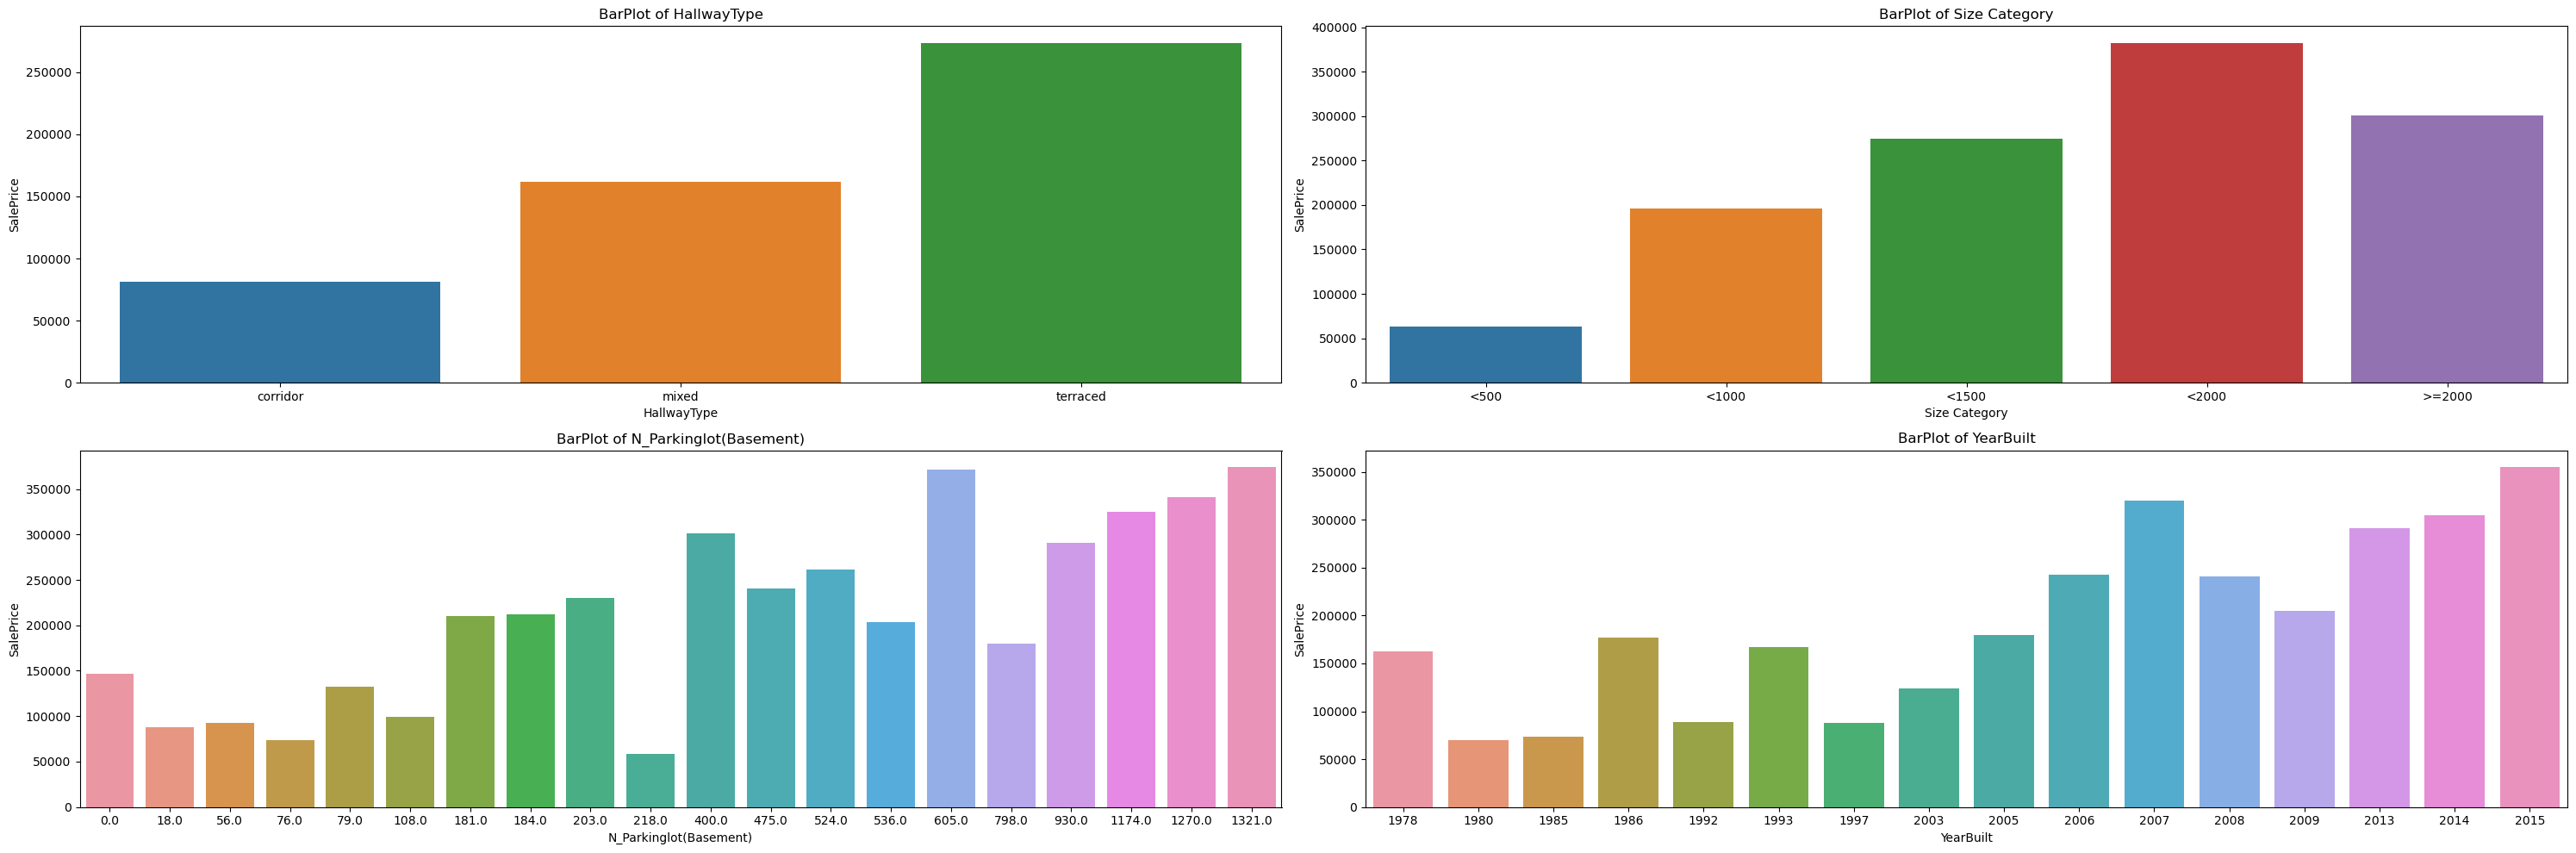

In [393]:
plt.figure(figsize=(30,10))
a = 1 

for i in pd.Series(dfzz.columns)[[0,11,6,7]] :
    plt.subplot(2,2,a)
    sns.barplot(data=dfzz.sort_values('SalePrice'),x=i,y='SalePrice',estimator=np.median,ci=0)
    plt.title(f'BarPlot of {i}')
    plt.tight_layout()
    a += 1

Based on feature importance and EDA above, we notice that the most importance features are

1. HallwayType
    'terraced' have the highest median price followed by 'mixed','corridor'
1. Size(sqf)
    positive correlation (in general the bigger size of apartment will lead to higher price)
1. N_Parkinglot 
    positive correlation (in general the higher parking lot of apartment will lead to higher price)
1. YearBuilt
    positive correlation (in general newer apartment will lead to higher price)
    

**notes : some features are duplicated due to polynomial preprocessing = 1** 

In [305]:
df_after_transform = pd.DataFrame(
    columns= feat_all,
    data=transformer.fit_transform(X_train)
)
df_after_transform.head()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,x0,x1,TimeToSubway,1,N_FacilitiesNearBy(ETC),...,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,0.8,0.5,1.0,0.424635,0.666667,-1.0,0.5,-1.0,1.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.5,-0.515397,-1.333333,-1.0,-1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.2,-0.5,0.0,1.189627,1.666667,2.0,1.0,0.5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.2,-0.5,-0.5,-0.575365,-0.333333,0.0,-0.5,0.5,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.5,1.0,0.424635,0.666667,1.0,0.5,-1.0,1.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking machine learning tuning 1 prediction on random data

In [69]:
X_test.iloc[[297],:]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
1864,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131


In [70]:
y_test.iloc[[297]]

1864    217699
Name: SalePrice, dtype: int64

In [71]:
best_model.predict(X_test.iloc[[297],:])

array([196592.075])

## Model Limitation

In [321]:
X_train.describe().loc[['max','min'],:]

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
max,5.0,7.0,5.0,1321.0,2015.0,10.0,2337.0
min,0.0,0.0,0.0,0.0,1978.0,1.0,135.0


In [322]:
X_test.describe().loc[['max','min'],:]

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
max,5.0,7.0,5.0,1321.0,2015.0,10.0,2337.0
min,0.0,0.0,0.0,0.0,1978.0,1.0,135.0


In [323]:
UniqueVal[UniqueVal['Dtypes']=='object']

,ColumnName,NumberofUnique,Dtypes,UniqueValue
0,HallwayType,3,object,"[terraced, mixed, corridor]"
1,TimeToSubway,5,object,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,object,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"


This model only accurate to predict the apartment prices if
1. N_FacilitiesNearBy(ETC)	    `between 0-5`
2. N_FacilitiesNearBy(PublicOffice)	    `between 0-7`
3. N_SchoolNearBy(University)		    `between 0-5`
4. N_Parkinglot(Basement)			    `between 0-1321`
5. YearBuilt				    `between 1978-2015`
6. N_FacilitiesInApt					    `between 1-10`
7. Size(sqf)					    `between 135-2337`
8. HallwayType					    `limit to 3 categories (terraced, mixed, corridor)`
9. HallwayType					    `limit to 5 categories (0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby)`
10. SubwayStation					    `limit to 5 categories (Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu)`

**Notes if the model is forced to predict the variable outside the limitation, the model performance will be less accurate compared to prediction between limitation data (learned data by machine)**

## Predict New Data (within limitation)

In [324]:
pd.Series(X.columns)

0    HallwayType                     
1    TimeToSubway                    
2    SubwayStation                   
3    N_FacilitiesNearBy(ETC)         
4    N_FacilitiesNearBy(PublicOffice)
5    N_SchoolNearBy(University)      
6    N_Parkinglot(Basement)          
7    YearBuilt                       
8    N_FacilitiesInApt               
9    Size(sqf)                       
dtype: object

In [325]:
# new dummy data to test prediction using ML
data_dummy = pd.DataFrame({
    X.columns[0] : ['mixed','terraced','corridor'],
    X.columns[1] : ['10min~15min','0-5min','0-5min'],
    X.columns[2] : ['Myung-duk','Sin-nam','Bangoge'],
    X.columns[3] : [2.0,5.0,3.0],
    X.columns[4] : [7.0,3.0,1.0],
    X.columns[5] : [3.0,2.0,2.0],
    X.columns[6] : [613.0,1112.0,88.0],
    X.columns[7] : [2006.0,2015.0,1999.0],
    X.columns[8] : [2.0,7.0,10.0],
    X.columns[9] : [2250.0,1120.0,250.0],
})
data_dummy

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,mixed,10min~15min,Myung-duk,2.0,7.0,3.0,613.0,2006.0,2.0,2250.0
1,terraced,0-5min,Sin-nam,5.0,3.0,2.0,1112.0,2015.0,7.0,1120.0
2,corridor,0-5min,Bangoge,3.0,1.0,2.0,88.0,1999.0,10.0,250.0


In [326]:
# predict with best model
data_dummy['SalePrice(Predicted)']=(best_model.predict(data_dummy))
data_dummy

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice(Predicted)
0,mixed,10min~15min,Myung-duk,2.0,7.0,3.0,613.0,2006.0,2.0,2250.0,202069.151
1,terraced,0-5min,Sin-nam,5.0,3.0,2.0,1112.0,2015.0,7.0,1120.0,370347.755
2,corridor,0-5min,Bangoge,3.0,1.0,2.0,88.0,1999.0,10.0,250.0,68981.162


Based on the machine learning above the prediction Sale Price for apartment are 

Apartment 0 = ₩ 202069.151 +/- 18.61% (₩ 164464.08 until ₩ 239674.22)

Apartment 1 = ₩ 370347.755 +/- 18.61% (₩ 301426.03 until ₩ 439269.47)

Apartment 2 = ₩ 68981.162 +/- 18.61% (₩ 81818.55 until ₩ 56143.76)

### Conclusion & Suggestion

In [398]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [397]:
df_metrics

,Benchmark,Tuning 1,difference
MAE,37749.977355,36960.575950,-789.401405
MAPE,19.559864,18.610575,-0.949289
RMSE,46420.495824,47000.644511,580.148687
Varians Score,0.808664,0.805544,-0.003120
R^2,0.808423,0.803604,-0.004818


**Conclusion**
1. The MAE metrics (₩ 36.690) of this model still need to improve since the MAE value is higher than the lowest sale price in dataset (₩ 32.743). It means that lowest data will assumed have ₩ 0. Suggest not to used this metrics if the apartment value is low
2. The MAPE metrics (18.61%) of this model could be used for all range price of apartment but in the downside value that is overesimated (prediction higher than actual) will causing MAPE value is more significant than error in underestimated value
3. The RMSE metrics (47000.644) of this model tends higher than MAE metrics due to outliers data that is used as fitting data for machine learning
4. R square metrics define that based on this model, 80% variance of target already representated by the current features


**Recommendation**

To improve accuracy of this model, I suggest to separate the data into 3 different machine learning based on feature importance for example make specified machine learning for HallywayType 'Terrace','Corridor' and 'Mixed'. Hopefully by fragmanted the data could make the data more similar (same characteristics and less outlier). Therefore, the machine could predict more accurate

## Saving Model (Using Pickle)

In [222]:
import pickle

In [327]:
# save with pickle
pickle.dump(best_model, open('ranfor(Apartment Data)-Lemmy.sav', 'wb'))

In [328]:
# load model

model_loaded = pickle.load(open('ranfor(Apartment Data)-Lemmy.sav', 'rb'))
model_loaded

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt']),
                                                 ('binsc',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                           